# Analysis on aerosol experiments 

In [118]:
import pandas as pd 
from pandas import Series, DataFrame
%matplotlib inline

# Load in dataset

In [119]:
nums = [150, 350, 500, 1000, 2000, 5000 ]
str1 = './data/PCP_IC_MonteCarlo_ccn'
str2 = str(120)
str3 = '.txt'
pathlist = [str1 + str(num) + str3 for num in nums]

In [120]:
def readindata(pathlist,stage):
    for i, path in enumerate(pathlist):
        globals()['df%s' % nums[i]] = pd.read_fwf(path, names=['developing','mature','dissipating'])

    df = DataFrame({"PCP150": df150[stage], 'PCP350': df350[stage], 'PCP500': df500[stage], 'PCP1000': df1000[stage],
                    'PCP2000': df2000[stage], 'PCP5000': df5000[stage]})
    return df

# PCP - Developing

In [121]:
stage = 'developing'
df = readindata(pathlist, stage)
df.columns.name = stage
df.describe() 

developing,PCP1000,PCP150,PCP2000,PCP350,PCP500,PCP5000
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,0.030201,0.040520,0.021223,0.040601,0.038205,0.012760
std,0.037870,0.043983,0.031173,0.043575,0.042320,0.021579
min,0.000208,0.000157,0.000279,0.000167,0.000176,0.000449
25%,0.003973,0.008289,0.002248,0.008418,0.007172,0.001999
50%,0.015517,0.025333,0.008215,0.026215,0.023663,0.004513
75%,0.042756,0.058358,0.027387,0.058414,0.054965,0.013759
max,0.336683,0.365041,0.312287,0.358510,0.353106,0.265478


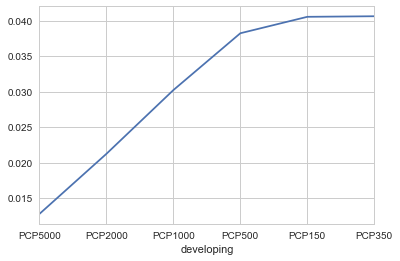

In [122]:
dfstats = df.describe()
dfmean = dfstats.ix['mean',:].sort_values()
dfmean.plot()

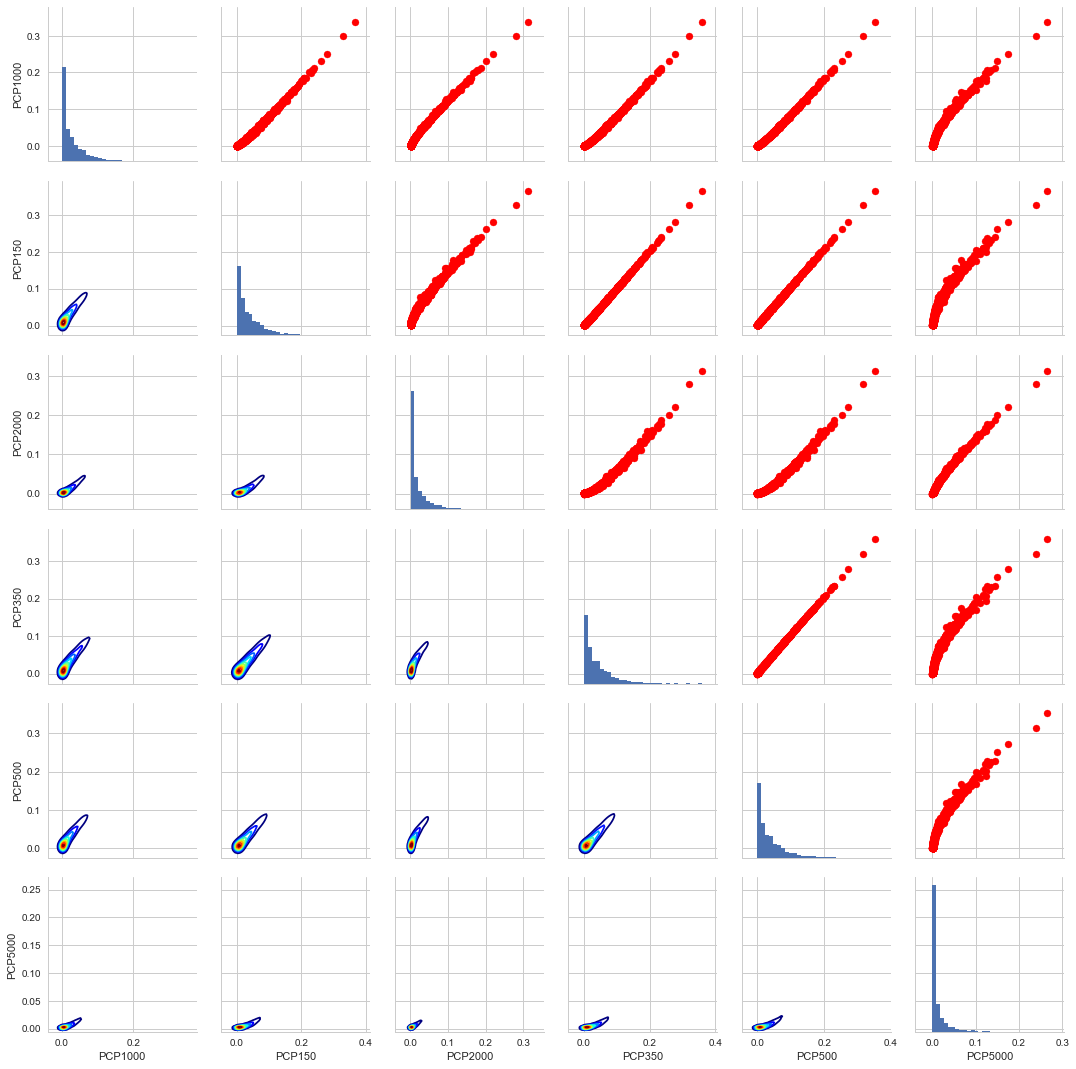

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt 
#setting plot 
sns.set_style('whitegrid')
pairplot_df = sns.PairGrid(df) # set up the plot
pairplot_df.map_upper(plt.scatter,color='red') # specify upper triangle 
pairplot_df.map_lower(sns.kdeplot,cmap='jet') # specify the lower triangle as kdeplot and color (BluePurple)
pairplot_df.map_diag(plt.hist,bins=30) # define the triangle plot as histogram

# PCP - Mature

In [85]:
stage = 'mature'
df = readindata(pathlist, stage)
df.columns.name = 'mature'
df.describe() # large mean value in PCP2000, PCP5000, needs to remove outliers

mature,PCP1000,PCP150,PCP2000,PCP350,PCP500,PCP5000
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,1.288374,1.351116,334.857251,1.327651,1.315786,250.428528
std,0.568261,0.564832,13612.443476,0.564603,0.565351,10169.434640
min,0.010117,0.013812,0.021146,0.015004,0.013775,0.010270
25%,0.880526,0.955798,0.849694,0.930332,0.919052,0.797954
50%,1.292400,1.357360,1.254550,1.332110,1.321040,1.203960
75%,1.701340,1.771160,1.664680,1.745750,1.733610,1.612580
max,3.003630,3.073510,555449.000000,3.043550,3.032280,414959.000000


# Remove outliers 

In [86]:
import numpy as np
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)]

In [105]:
dfstats = df.describe()
dfmean = dfstats.ix['mean',:].sort_values()

# Smaller CCN values tend to have larger mean PCP at mature stage

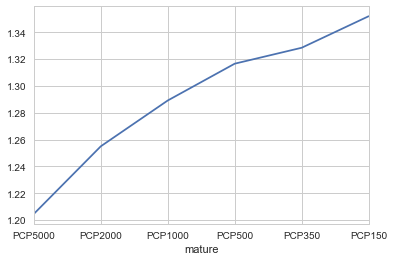

In [109]:
dfmean.plot()

# Pairwise Plots

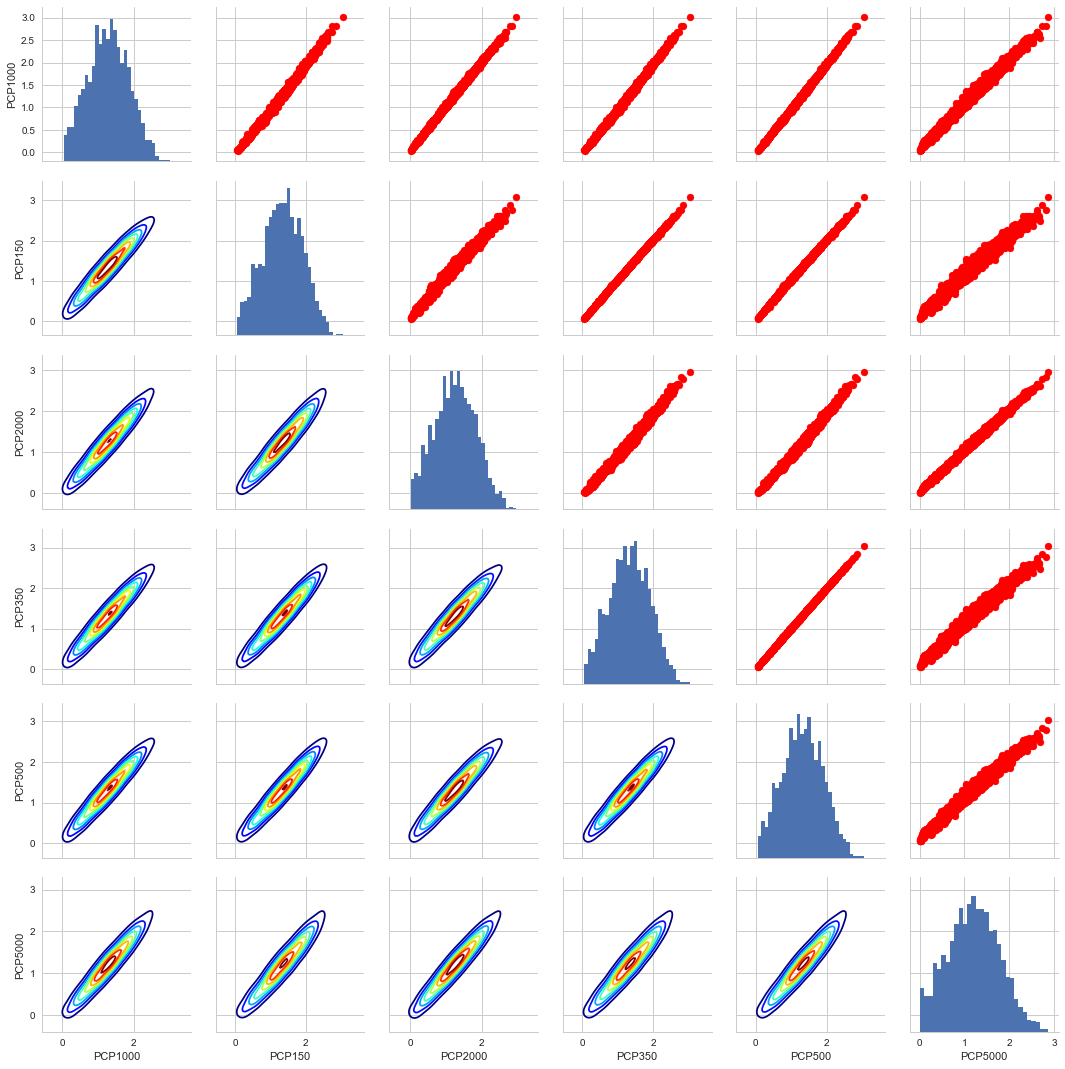

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt 
#setting plot 
sns.set_style('whitegrid')
pairplot_df = sns.PairGrid(df) # set up the plot
pairplot_df.map_upper(plt.scatter,color='red') # specify upper triangle 
pairplot_df.map_lower(sns.kdeplot,cmap='jet') # specify the lower triangle as kdeplot and color (BluePurple)
pairplot_df.map_diag(plt.hist,bins=30) # define the triangle plot as histogram

# PCP - Dissipating

In [123]:
stage = 'dissipating'
df = readindata(pathlist, stage)
df.columns.name = stage
df.describe() # large mean value in PCP2000, PCP5000, needs to remove outliers

dissipating,PCP1000,PCP150,PCP2000,PCP350,PCP500,PCP5000
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,0.764334,0.708509,0.817034,0.719913,0.730449,0.900416
std,0.230032,0.198726,0.253766,0.205260,0.211394,0.286369
min,0.203327,0.114725,0.222491,0.130447,0.147847,0.233682
25%,0.612950,0.577714,0.648500,0.582628,0.589538,0.713969
50%,0.741031,0.690068,0.787457,0.702265,0.713507,0.863709
75%,0.879203,0.816174,0.934881,0.833340,0.843454,1.033840
max,2.265310,1.700680,2.380320,1.747310,1.829470,2.296210


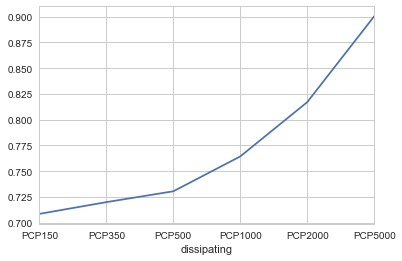

In [124]:
dfstats = df.describe()
dfmean = dfstats.ix['mean',:].sort_values()
dfmean.plot()

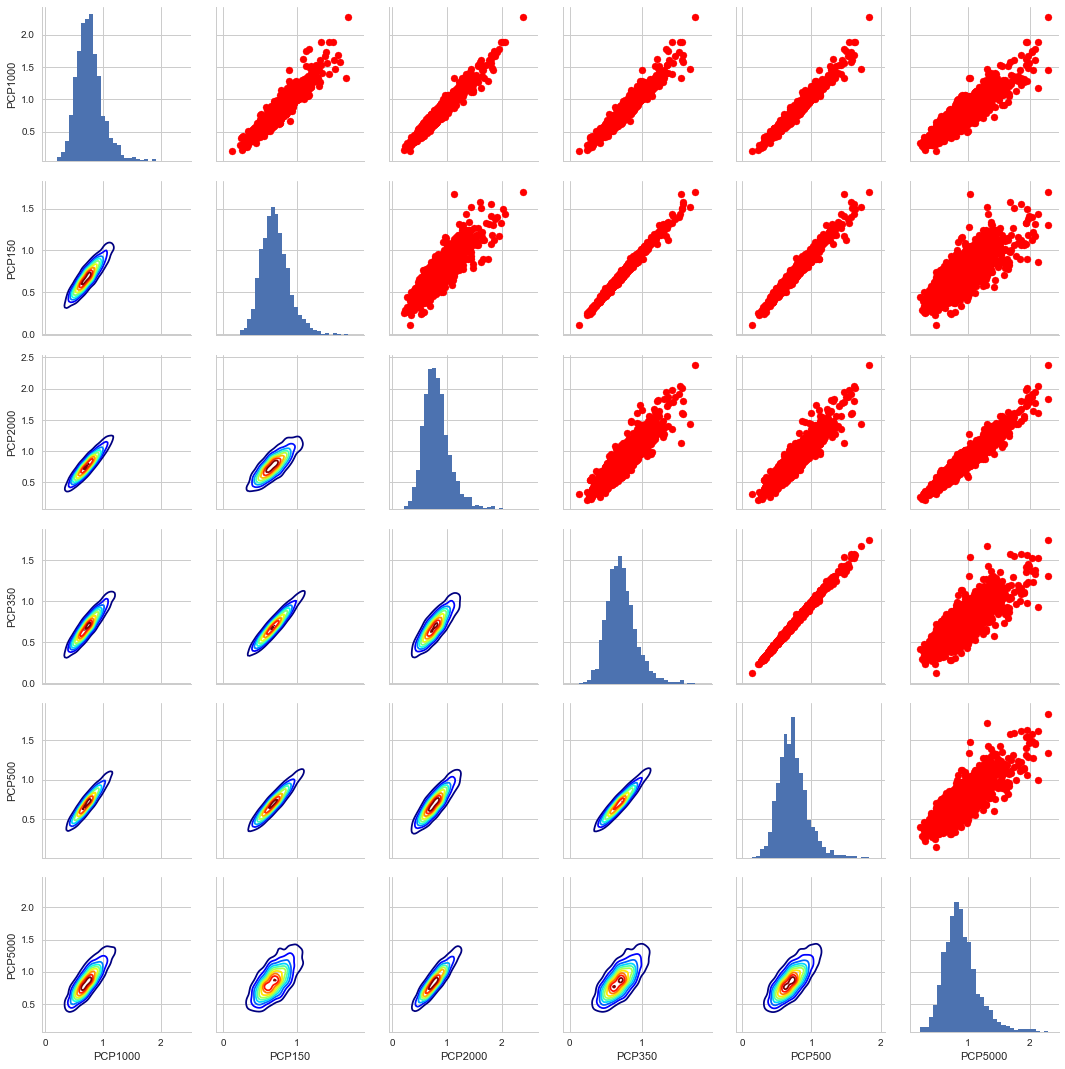

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt 
#setting plot 
sns.set_style('whitegrid')
pairplot_df = sns.PairGrid(df) # set up the plot
pairplot_df.map_upper(plt.scatter,color='red') # specify upper triangle 
pairplot_df.map_lower(sns.kdeplot,cmap='jet') # specify the lower triangle as kdeplot and color (BluePurple)
pairplot_df.map_diag(plt.hist,bins=30) # define the triangle plot as histogram